testa

testb
<_io.TextIOWrapper name='C:/Users/cauri/Documents/data_test1.rgb' mode='r' encoding='cp1252'>
C:/Users/cauri/Documents/data_test1.wav
48000
(14394335,)


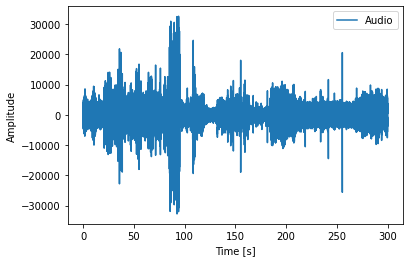



chiMin 1487.941073637092
chiMax 29012534.498450294


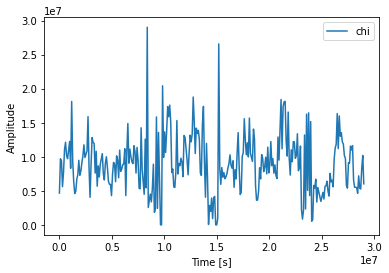

thisMin 5626842.333333333
thisMax 46060953.0


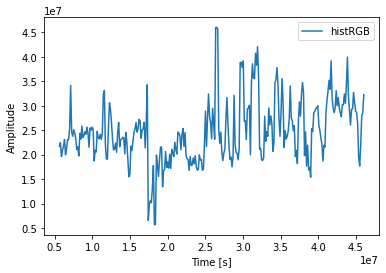

thisMin 18325.999487376714
thisMax 23472.371340693222


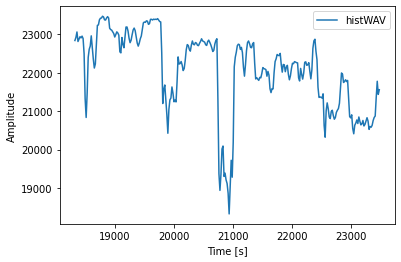

thisMin 0.009159012788121734
thisMax 0.12354549570372875


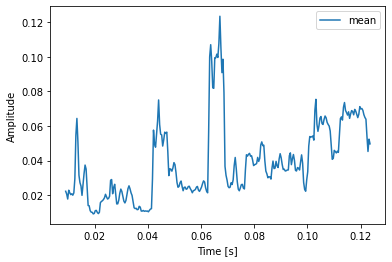

thisMin 3.6575600922624667
thisMax 7.976452492636309


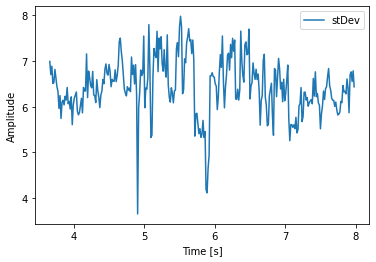

thisMin 17.0
thisMax 22.0


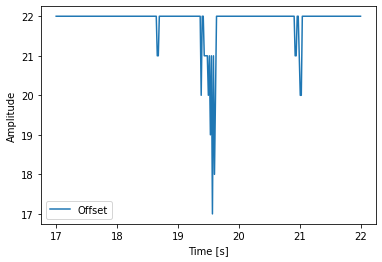

thisMin 19.0
thisMax 22.0


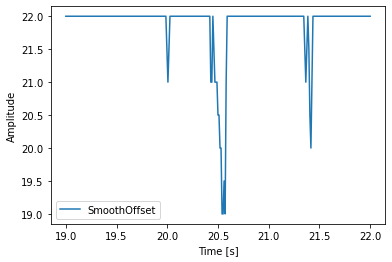

thisMin 2299.686814578652
thisMax 431704.56874215824


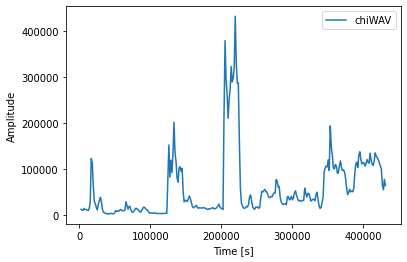

thisMin 7.14223446291557
thisMax 94.08961220374412


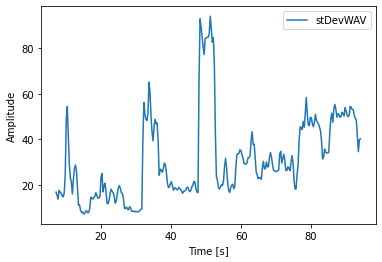

thisMin nan
thisMax nan


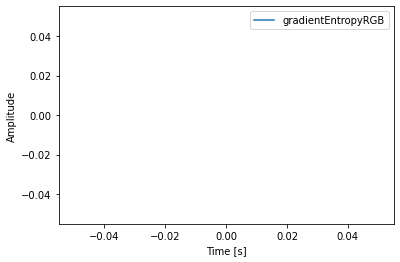

thisMin 0.0493583054136687
thisMax 0.872484941689094


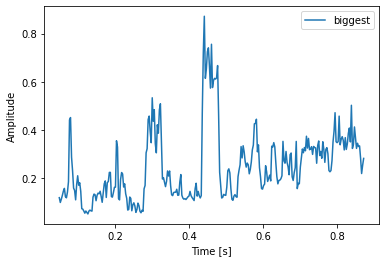

thisMin 7.323190714192407e-05
thisMax 0.28562274583035824


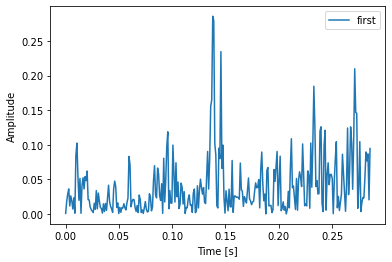

In [8]:
import sys
import numpy as np
from scipy.io import wavfile
import soundfile as sf
from PIL import Image
from PIL import SgiImagePlugin
import linecache
import cv2 as cv
#import rgbimg

#1. Read in the input video/audio – remember you might not be able to fit the entire content in memory for processing.
##inputVideo = open(sys.argv[1] , "r")
##iv = inputVideo.read() #inputVideo.rgb
##inputAudio = open(sys.argv[2], "r")
##ia = inputAudio.read() #inputAudio.wav
##ov = open(sys.argv[3], "w") #outputVideo.rgb
##oa = open(sys.argv[4], "w") #outputAudio.wav

#1a. Temporary local file by-pass of command line arguments.
#inputVideo = rgbimg.longimagedata("C:\\Users\cauri\Documents\Starbucks_Ad_15s.rgb")
#print(inputVideo)
#inputVideo = SgiImagePlugin.Image.open("C:/Users/cauri/Documents/Starbucks_Ad_15s.rgb", "r")# data_test1.rgb", "r", errors="ignore")
#XXX change - MemoryError
#iv = inputVideo.read() #inputVideo.rgb

print('testa')
iv = 0
ia = 0
try: 
    iv = open('C:/Users/cauri/Documents/data_test1.rgb','r')
    try: 
        iv.seek(0)
        str = iv.read(0)
        print(str)
    except:
        print("Problem reading the file.")
    finally: 
        iv.close()
except: 
    print("Problem opening the file.")
print('testb')

ia = "C:/Users/cauri/Documents/data_test1.wav" #data_test1.wav", "r") #inputAudio.wav
ov = open("C:/Users/cauri/Documents/outputVideo.rgb", "w") #outputVideo.rgb
oa = open("C:/Users/cauri/Documents/outputAudio.wav", "w") #outputAudio.wav

wavSampleRate, wavData = wavfile.read(ia)

print(iv)
print(ia)
print(wavSampleRate)
print(wavData.shape)

#2. Break the input video into a list of logical segments – shots (see anatomy of a video below) How can you achieve this?

import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., 300, wavData.shape[0])
plt.plot(time, wavData[:], label="Audio")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

statsString = ""
try: 
    stats = open('C:/Users/cauri/Documents/stats.csv','r')
    try: 
        stats.seek(0)
        statsString = stats.read(0)
        print(statsString)
    except:
        print("Problem reading the file.")
    finally: 
        stats.close()
except: 
    print("Problem opening the file.")

print(statsString) 
s=[]
with open('C:/Users/cauri/Documents/stats.csv', 'r') as file:
    for line in file:
        t = []
        for num in line.strip().split(','):
            t.append(float(num))
        s.append(t)
chiStats = s[0]
histRGBStats = s[1]
histWAVStats = s[2]
meanStats = s[3]
stDevStats = s[4]
offsetSumStats = s[5]
smoothOffsetSumStats = s[6]
chiWAVStats = s[7]
stDevWAVStats = s[8]
gradientEntropyRGBStats = s[9]
biggestStats = s[10]
firstStats = s[11]

chiMin = min(chiStats)
chiMax = max(chiStats)
print('chiMin',chiMin)
print('chiMax',chiMax)
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(chiMin, chiMax, len(chiStats))
plt.plot(time, chiStats, label="chi")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

thisMin = min(histRGBStats)
thisMax = max(histRGBStats)
print('thisMin',thisMin)
print('thisMax',thisMax)
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(thisMin, thisMax, len(histRGBStats))
plt.plot(time, histRGBStats[:], label="histRGB")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

thisMin = min(histWAVStats)
thisMax = max(histWAVStats)
print('thisMin',thisMin)
print('thisMax',thisMax)
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(thisMin, thisMax, len(histWAVStats))
plt.plot(time, histWAVStats[:], label="histWAV")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

thisMin = min(meanStats)
thisMax = max(meanStats)
print('thisMin',thisMin)
print('thisMax',thisMax)
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(thisMin, thisMax, len(meanStats))
plt.plot(time, meanStats[:], label="mean")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

thisMin = min(stDevStats)
thisMax = max(stDevStats)
print('thisMin',thisMin)
print('thisMax',thisMax)
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(thisMin, thisMax, len(stDevStats))
plt.plot(time, stDevStats[:], label="stDev")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

thisMin = min(offsetSumStats)
thisMax = max(offsetSumStats)
print('thisMin',thisMin)
print('thisMax',thisMax)
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(thisMin, thisMax, len(offsetSumStats))
plt.plot(time, offsetSumStats[:], label="Offset")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

thisMin = min(smoothOffsetSumStats)
thisMax = max(smoothOffsetSumStats)
print('thisMin',thisMin)
print('thisMax',thisMax)
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(thisMin, thisMax, len(smoothOffsetSumStats))
plt.plot(time, smoothOffsetSumStats[:], label="SmoothOffset")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

thisMin = min(chiWAVStats)
thisMax = max(chiWAVStats)
print('thisMin',thisMin)
print('thisMax',thisMax)
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(thisMin, thisMax, len(chiWAVStats))
plt.plot(time, chiWAVStats[:], label="chiWAV")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

thisMin = min(stDevWAVStats)
thisMax = max(stDevWAVStats)
print('thisMin',thisMin)
print('thisMax',thisMax)
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(thisMin, thisMax, len(stDevWAVStats))
plt.plot(time, stDevWAVStats[:], label="stDevWAV")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

thisMin = min(gradientEntropyRGBStats)
thisMax = max(gradientEntropyRGBStats)
print('thisMin',thisMin)
print('thisMax',thisMax)
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(thisMin, thisMax, len(gradientEntropyRGBStats))
plt.plot(time, gradientEntropyRGBStats[:], label="gradientEntropyRGB")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

thisMin = min(biggestStats)
thisMax = max(biggestStats)
print('thisMin',thisMin)
print('thisMax',thisMax)
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(thisMin, thisMax, len(biggestStats))
plt.plot(time, biggestStats[:], label="biggest")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

thisMin = min(firstStats)
thisMax = max(firstStats)
print('thisMin',thisMin)
print('thisMax',thisMax)
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(thisMin, thisMax, len(firstStats))
plt.plot(time, firstStats[:], label="first")
#plt.plot(time, data[:, 1], label="Right channel") #[:,1] all the second column of the dataset
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

hSum=0.0

#for(int b=0;b<48000;b++){ //at each second
#    double differenceWAV = Math.abs(refAudio[0][b]-refAudio[1][b]);
#    hSum = hSum+differenceWAV;
#}
#double histWAVStatistic = hSum;
#System.out.println("histWAVStatistic"+histWAVStatistic);
#histWAVStats.add(histWAVStatistic);


#3. Give each shot a variety of quantitative weights such as – length of shot, motion characteristics in the shot, audio levels, color statistics etc.



#4. Using the above characteristics, decide whether a shot or a group of adjacent shots might be an advertisement
#Identify start and end time of advertisements in the video(using .avi format)
##startTimesFile = open("startTimes.txt", "w")
startTimesFile = open("C:\\Users\cauri\Documents\startTimes.txt", "w")
startTimes = []
##startTimes.append()

#5. Remove the shots that correspond to the advertisement. Write out the new video/audio file.
#Remove ads and corresponding audio.



##ov.write()
##oa.write()

#inputVideo.close()
#inputAudio.close()
ov.close()
oa.close()
startTimesFile.close()

#
#PART 3
#
#6. If brands are detected, replace the old advertisement with a new advertisement to write out the new video/audio file.

